In [ ]:
asddasdsdaasd

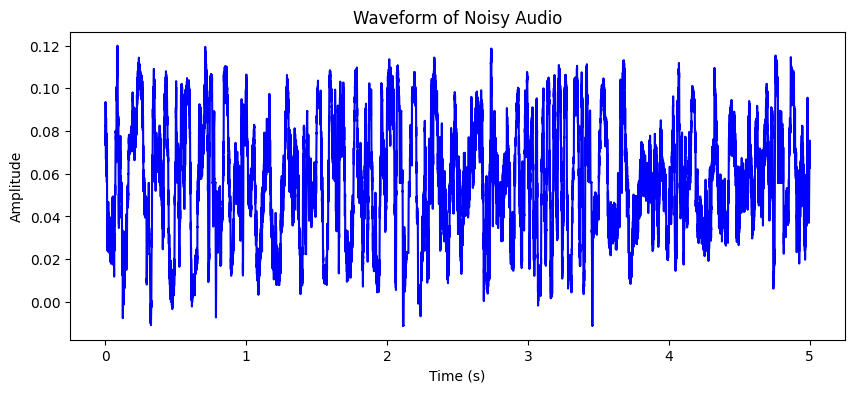

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load the noisy audio file (assuming it's already loaded)
noisy_audio, sr = librosa.load('/content/ZGTmcuxD4FPWzcddeqXi_raw.wav', sr=8000)

# Plot the waveform of the noisy audio
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(noisy_audio) / sr, len(noisy_audio)), noisy_audio, color='blue')
plt.title('Waveform of Noisy Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()




In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.5 MB/s eta 0:00:00


In [ ]:

import pywt

# Perform wavelet denoising (as explained earlier)
wavelet = 'db4'
level = 6

# Wavelet decomposition
coeffs = pywt.wavedec(noisy_audio, wavelet, level=level)

# Soft thresholding
def soft_thresholding(data, threshold):
    return np.sign(data) * np.maximum(np.abs(data) - threshold, 0)

# Calculate threshold
threshold = np.median(np.abs(coeffs[-1])) / 0.6745 * np.sqrt(2 * np.log(len(noisy_audio)))

# Apply thresholding
denoised_coeffs = [soft_thresholding(c, threshold) if i > 0 else c for i, c in enumerate(coeffs)]

# Reconstruct the cleaned signal
denoised_audio = pywt.waverec(denoised_coeffs, wavelet)



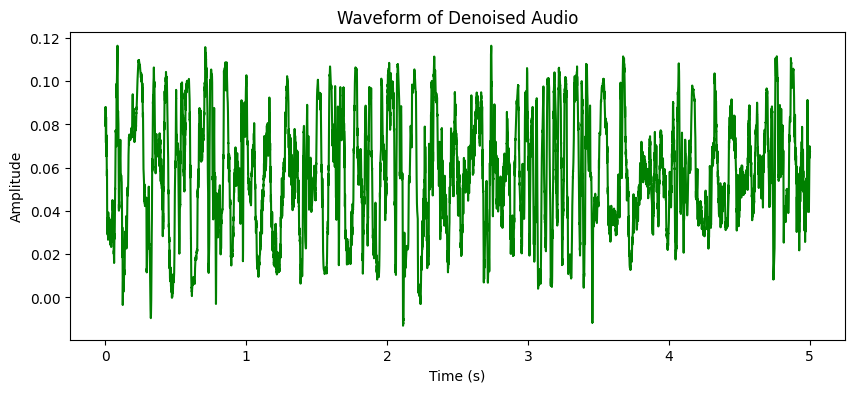

In [ ]:

# Plot the waveform of the denoised audio
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(denoised_audio) / sr, len(denoised_audio)), denoised_audio, color='green')
plt.title('Waveform of Denoised Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


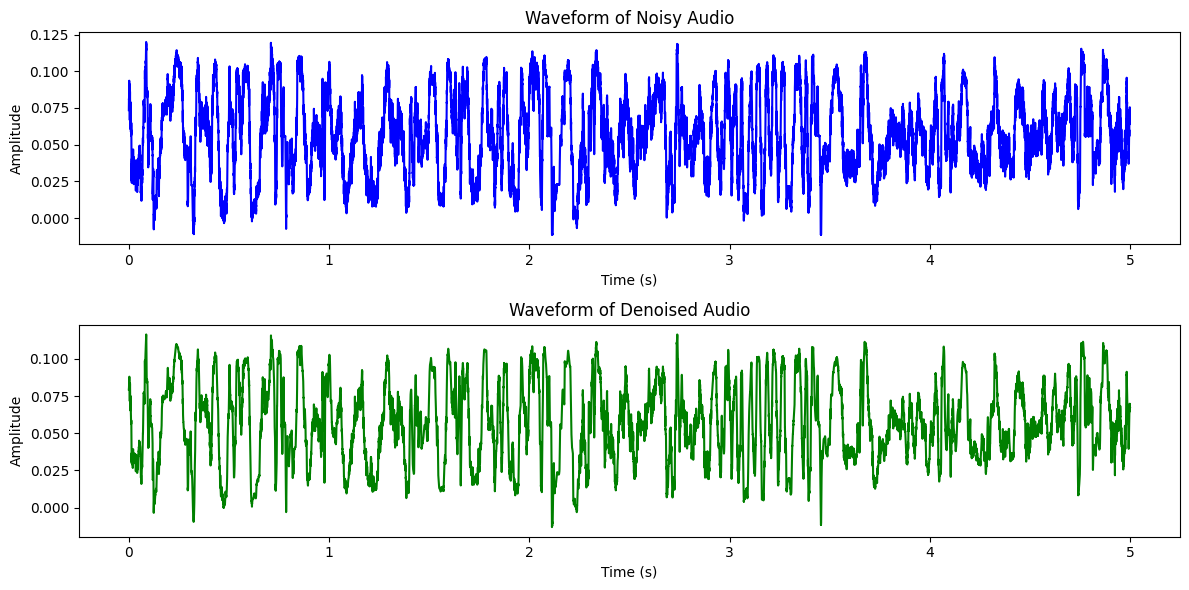

In [ ]:
# Plot both waveforms
plt.figure(figsize=(12, 6))

# Noisy Audio
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(noisy_audio) / sr, len(noisy_audio)), noisy_audio, color='blue')
plt.title('Waveform of Noisy Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Denoised Audio
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, len(denoised_audio) / sr, len(denoised_audio)), denoised_audio, color='green')
plt.title('Waveform of Denoised Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()



In [ ]:
import librosa
import soundfile as sf

target_audio, sr = librosa.load('/content/13918_AV.wav', sr=8000)

noise_audio, _ = librosa.load('/content/8gJZEQW46I0zxboNSnoL_raw.wav', sr=8000)


In [ ]:
pip install pywavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.0 MB/s eta 0:00:00


In [ ]:
import pywt
import numpy as np

# Wavelet decomposition parameters
wavelet = 'db4'  # Daubechies wavelet (common choice for audio denoising)
level = 6  # The level of wavelet decomposition

# Perform discrete wavelet transform
coeffs = pywt.wavedec(target_audio, wavelet, level=level)

# Apply soft thresholding to reduce noise
def soft_thresholding(data, threshold):
    return np.sign(data) * np.maximum(np.abs(data) - threshold, 0)

# Set threshold based on noise level (you can tweak this based on your audio)
threshold = np.median(np.abs(coeffs[-1])) / 0.6745 * np.sqrt(2 * np.log(len(target_audio)))

# Apply the threshold to detail coefficients
denoised_coeffs = [soft_thresholding(c, threshold) if i > 0 else c for i, c in enumerate(coeffs)]

# Reconstruct the signal using the thresholded coefficients
denoised_audio = pywt.waverec(denoised_coeffs, wavelet)


In [ ]:
sf.write('cleaned_wavelet_audio.wav', denoised_audio, sr)
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

filtered_audio = lowpass_filter(denoised_audio, cutoff=3000, fs=sr)


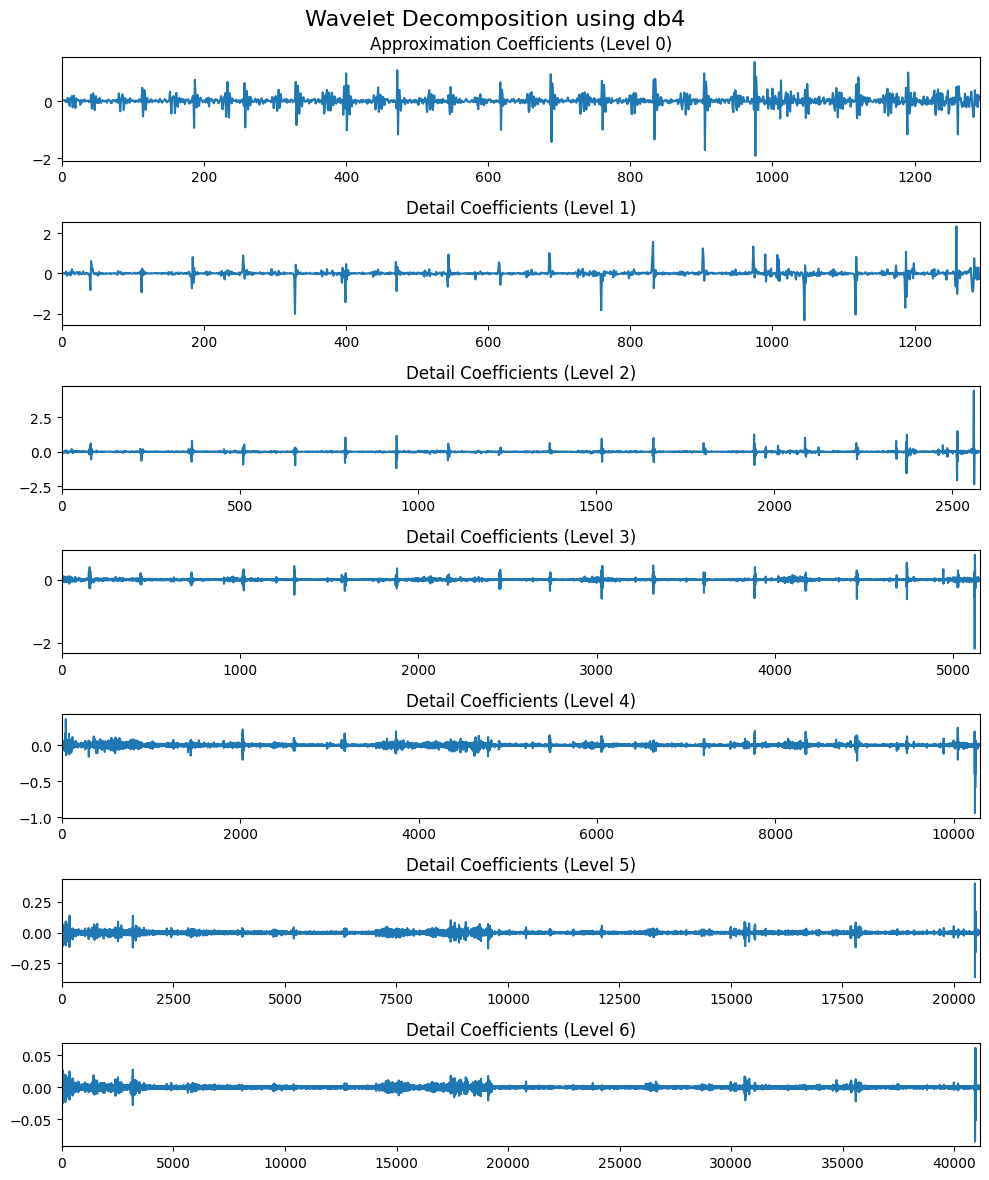

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Load the target audio file
import librosa
target_audio, sr = librosa.load('/content/13918_AV.wav', sr=8000)

# Wavelet decomposition parameters
wavelet = 'db4'  # Daubechies wavelet
level = 6  # Number of decomposition levels

# Perform wavelet decomposition
coeffs = pywt.wavedec(target_audio, wavelet, level=level)

# Plot the wavelet coefficients at each level
def plot_wavelet_coeffs(coeffs, signal_length, wavelet):
    fig, axs = plt.subplots(len(coeffs), 1, figsize=(10, 12))

    for i, coeff in enumerate(coeffs):
        axs[i].plot(coeff)
        if i == 0:
            axs[i].set_title(f"Approximation Coefficients (Level {i})", fontsize=12)
        else:
            axs[i].set_title(f"Detail Coefficients (Level {i})", fontsize=12)
        axs[i].set_xlim(0, len(coeff))

    fig.suptitle(f"Wavelet Decomposition using {wavelet}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot wavelet decomposition
plot_wavelet_coeffs(coeffs, len(target_audio), wavelet)


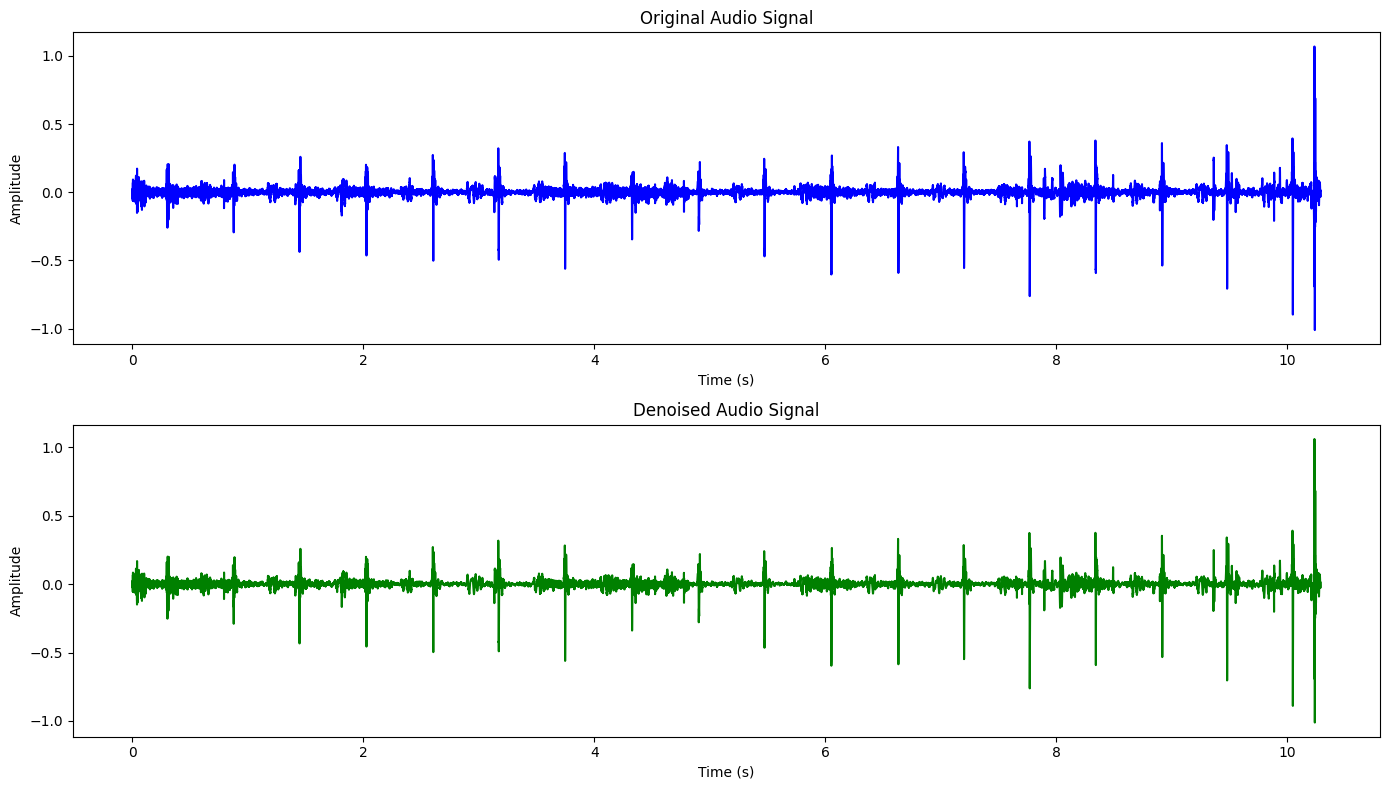

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

# Load the target audio file
target_audio, sr = librosa.load('/content/13918_AV.wav', sr=8000)

# Wavelet decomposition parameters
wavelet = 'db4'  # Daubechies wavelet
level = 6  # The level of wavelet decomposition

# Perform discrete wavelet transform
coeffs = pywt.wavedec(target_audio, wavelet, level=level)

# Apply soft thresholding to reduce noise
def soft_thresholding(data, threshold):
    return np.sign(data) * np.maximum(np.abs(data) - threshold, 0)

# Set threshold based on noise level (you can tweak this)
threshold = np.median(np.abs(coeffs[-1])) / 0.6745 * np.sqrt(2 * np.log(len(target_audio)))

# Apply the threshold to detail coefficients (coefficients with index > 0 are detail coefficients)
denoised_coeffs = [soft_thresholding(c, threshold) if i > 0 else c for i, c in enumerate(coeffs)]

# Reconstruct the denoised signal using the thresholded coefficients
denoised_audio = pywt.waverec(denoised_coeffs, wavelet)

# Save the denoised audio to a new file
sf.write('cleaned_wavelet_audio.wav', denoised_audio, sr)

# Plot and compare original vs denoised signal
def plot_signals(original, denoised, sr):
    time_axis = np.linspace(0, len(original) / sr, num=len(original))

    plt.figure(figsize=(14, 8))

    # Plot original audio signal
    plt.subplot(2, 1, 1)
    plt.plot(time_axis, original, label="Original Audio", color='blue')
    plt.title("Original Audio Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Plot denoised audio signal
    plt.subplot(2, 1, 2)
    plt.plot(time_axis, denoised, label="Denoised Audio", color='green')
    plt.title("Denoised Audio Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Plot the original vs denoised audio signals
plot_signals(target_audio, denoised_audio, sr)


In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.5 MB/s eta 0:00:00


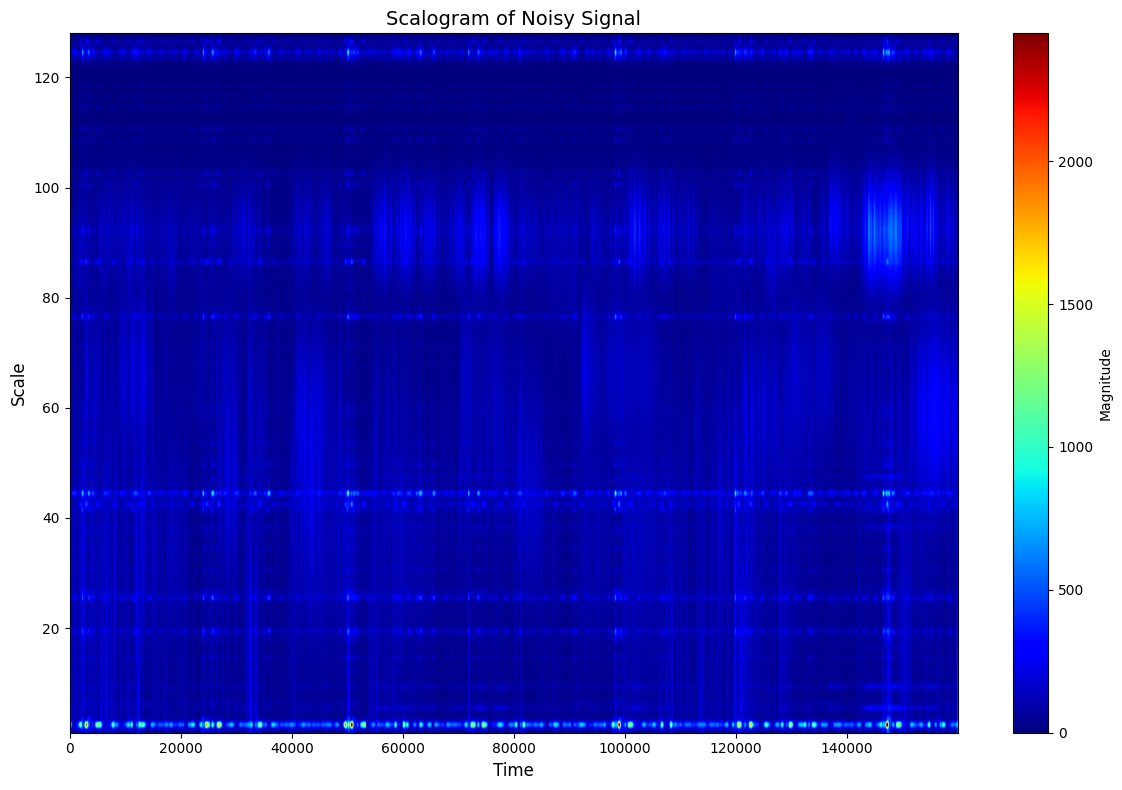

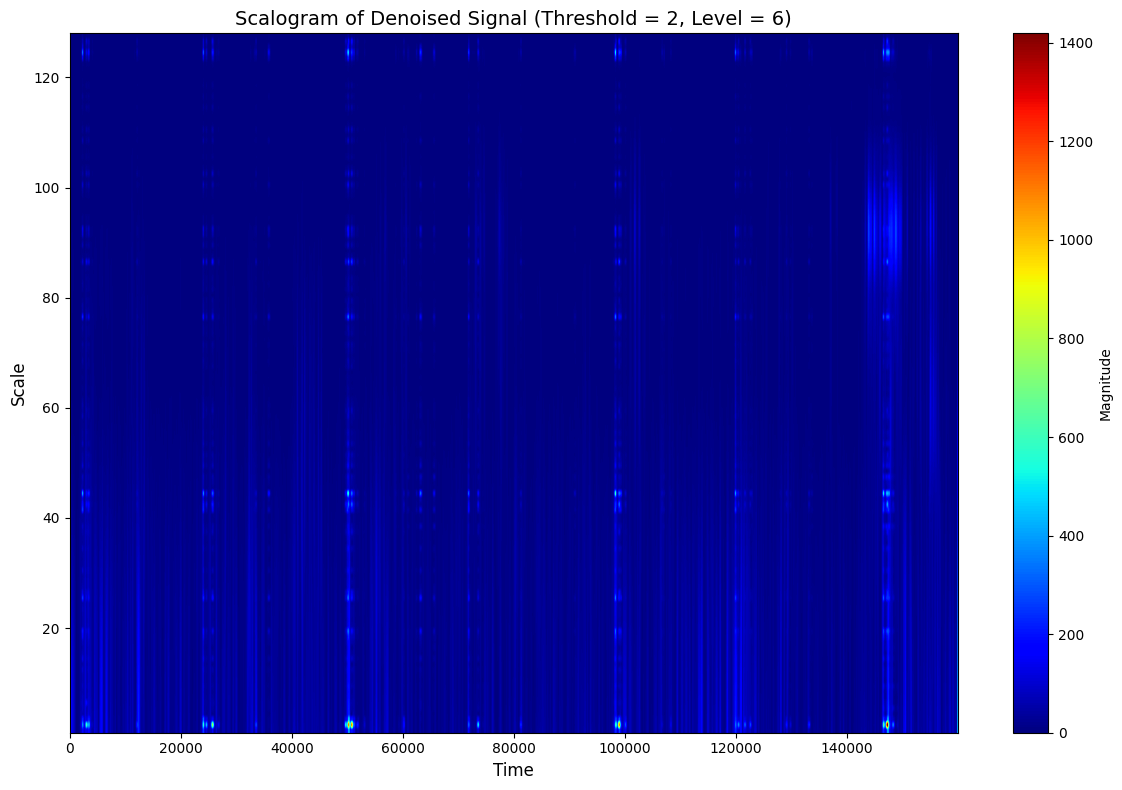

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pywt
import scipy.io.wavfile as wavfile

# Function to load wav file and return the audio signal and framerate
def load_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        framerate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        signal = wav_file.readframes(n_frames)
        signal = np.frombuffer(signal, dtype=np.int16)

        # If stereo, average both channels
        if n_channels == 2:
            signal = signal.reshape(-1, 2)
            signal = signal.mean(axis=1)

        return signal, framerate

# Improved wavelet denoising function
def improved_wavelet_denoising(signal, wavelet='db4', threshold=0.1, level=6):
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Apply threshold to each level's coefficients
    coeffs_thresholded = [pywt.threshold(c, threshold * np.std(c), mode='soft') for c in coeffs]

    # Reconstruct the signal from the thresholded coefficients
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)

    # Ensure the signal length is the same as the original signal
    denoised_signal = denoised_signal[:len(signal)]

    return denoised_signal

# Function to plot scalogram
def plot_scalogram(signal, title, wavelet='cmor1.5-1.0', scale_range=128):
    scales = np.arange(1, scale_range)
    coef, freqs = pywt.cwt(signal, scales, wavelet)

    plt.figure(figsize=(12, 8))
    plt.imshow(np.abs(coef), extent=[0, len(signal), 1, scale_range], cmap='jet', aspect='auto',
               vmax=abs(coef).max() * 0.75, vmin=0)
    plt.colorbar(label='Magnitude')
    plt.title(f'Scalogram of {title}', fontsize=14)
    plt.ylabel('Scale', fontsize=12)
    plt.xlabel('Time', fontsize=12)
    plt.tight_layout()
    plt.show()

# Load  noisy audio file (replace with actual file path)
file_path_noisy = '/content/dOlBlisvBGBM9WE7MzUn_raw (1).wav'  # Path to your noisy audio file

# Load the noisy audio signal
signal_noisy, framerate_noisy = load_wav(file_path_noisy)

# Set a higher threshold and apply denoising
custom_threshold = 2  # Try a higher threshold
level_of_decomposition = 6  # Decompose to a higher level

# Apply improved wavelet denoising
denoised_signal = improved_wavelet_denoising(signal_noisy, threshold=custom_threshold, level=level_of_decomposition)

# Save the denoised audio to a new WAV file
output_file = 'improved_denoised_audio.wav'
wavfile.write(output_file, framerate_noisy, denoised_signal.astype(np.int16))

# Plot scalograms
plot_scalogram(signal_noisy, "Noisy Signal")
plot_scalogram(denoised_signal, f"Denoised Signal (Threshold = {custom_threshold}, Level = {level_of_decomposition})")






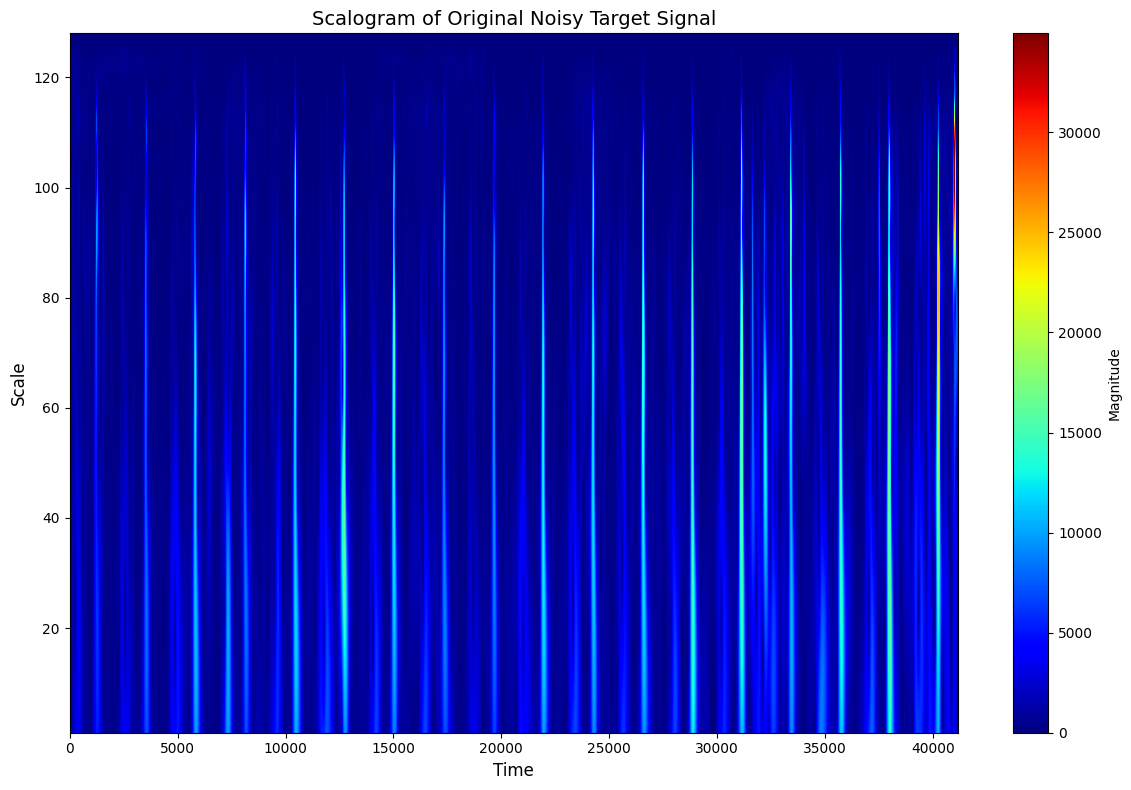

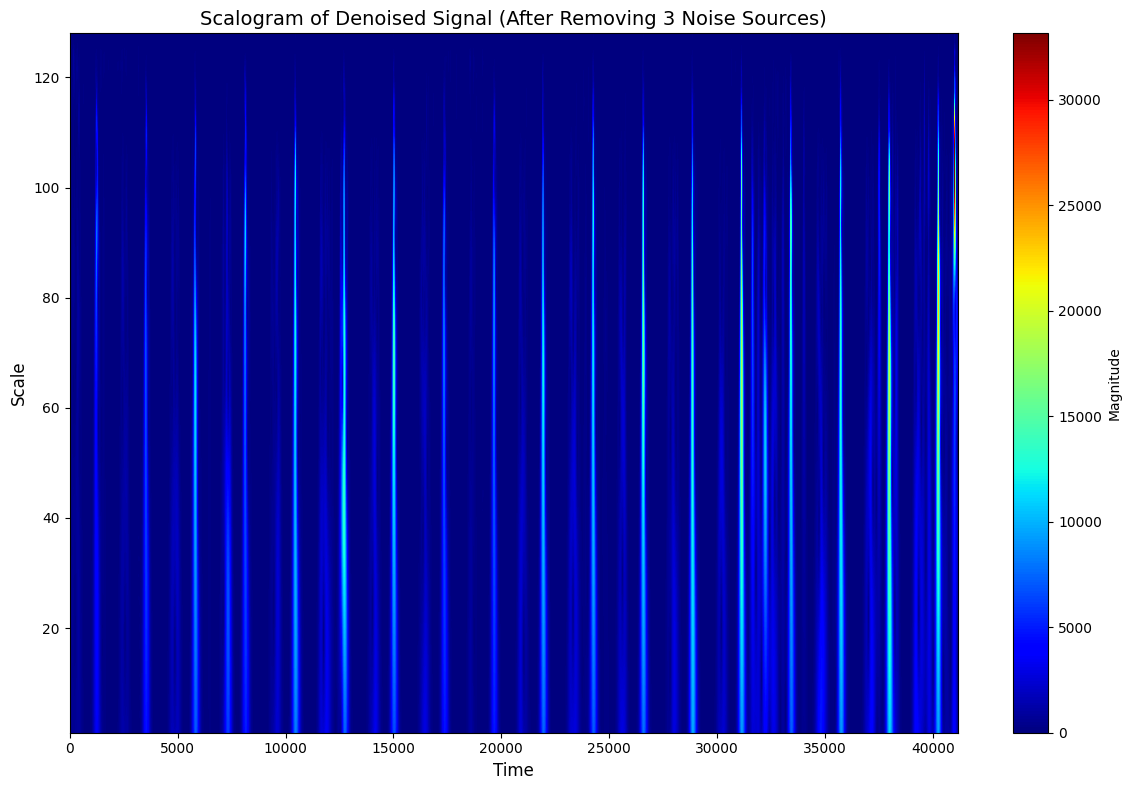

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pywt
import scipy.io.wavfile as wavfile

# Function to load wav file and return the audio signal and framerate
def load_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        framerate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        signal = wav_file.readframes(n_frames)
        signal = np.frombuffer(signal, dtype=np.int16)

        # If stereo, average both channels
        if n_channels == 2:
            signal = signal.reshape(-1, 2)
            signal = signal.mean(axis=1)

        return signal, framerate

# Apply wavelet denoising with adaptive threshold
def wavelet_denoising(signal, noise_signals, wavelet='db4', threshold=0.1, level=4):
    # Perform wavelet decomposition on the noisy signal
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Perform wavelet decomposition on each noise signal
    noise_coeffs = [pywt.wavedec(noise, wavelet, level=level) for noise in noise_signals]

    # Calculate the adaptive threshold based on noise levels
    coeffs_thresholded = []
    for i in range(len(coeffs)):
        # Sum the noise coefficients at each level and adjust the threshold
        noise_level = sum([np.std(noise_coeff[i]) for noise_coeff in noise_coeffs])
        threshold_adjusted = threshold * noise_level
        coeffs_thresholded.append(pywt.threshold(coeffs[i], threshold_adjusted, mode='soft'))

    # Reconstruct the denoised signal from thresholded coefficients
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)

    return denoised_signal

# Function to plot scalogram
def plot_scalogram(signal, title, wavelet='cmor1.5-1.0', scale_range=128):
    scales = np.arange(1, scale_range)
    coef, freqs = pywt.cwt(signal, scales, wavelet)

    plt.figure(figsize=(12, 8))
    plt.imshow(np.abs(coef), extent=[0, len(signal), 1, scale_range], cmap='jet', aspect='auto',
               vmax=abs(coef).max() * 0.75, vmin=0)
    plt.colorbar(label='Magnitude')
    plt.title(f'Scalogram of {title}', fontsize=14)
    plt.ylabel('Scale', fontsize=12)
    plt.xlabel('Time', fontsize=12)
    plt.tight_layout()
    plt.show()

# Load  audio files (replace with actual file paths)
file_path_target = '/content/13918_AV.wav'  # Path to the target audio
file_path_noise_1 = '/content/JRDcbQoMERNG7Ie3Ry5Z_raw.wav'  # Path to the first noise audio
file_path_noise_2 = '/content/ambient_WodxIwnGZySBjIxE8qmo_raw.wav'  # Path to the second noise audio
file_path_noise_3 = '/content/nREUPkjYRtfmaAffoluO_NoiseProfile_raw.wav'  # Path to the third noise audio

# Load audio signals
signal_target, framerate_target = load_wav(file_path_target)
signal_noise_1, _ = load_wav(file_path_noise_1)
signal_noise_2, _ = load_wav(file_path_noise_2)
signal_noise_3, _ = load_wav(file_path_noise_3)

# Combine all noise signals into a list
noise_signals = [signal_noise_1, signal_noise_2, signal_noise_3]

# Apply wavelet denoising considering all three noise types
custom_threshold = 2  # Set an appropriate threshold
level_of_decomposition = 4  # Set the level of decomposition

denoised_signal = wavelet_denoising(signal_target, noise_signals, threshold=custom_threshold, level=level_of_decomposition)

# Save the denoised audio to a new WAV file
output_file = 'denoised_audio_from_multiple_noises.wav'
wavfile.write(output_file, framerate_target, denoised_signal.astype(np.int16))

# Plot scalograms
plot_scalogram(signal_target, "Original Noisy Target Signal")
plot_scalogram(denoised_signal, "Denoised Signal (After Removing 3 Noise Sources)")


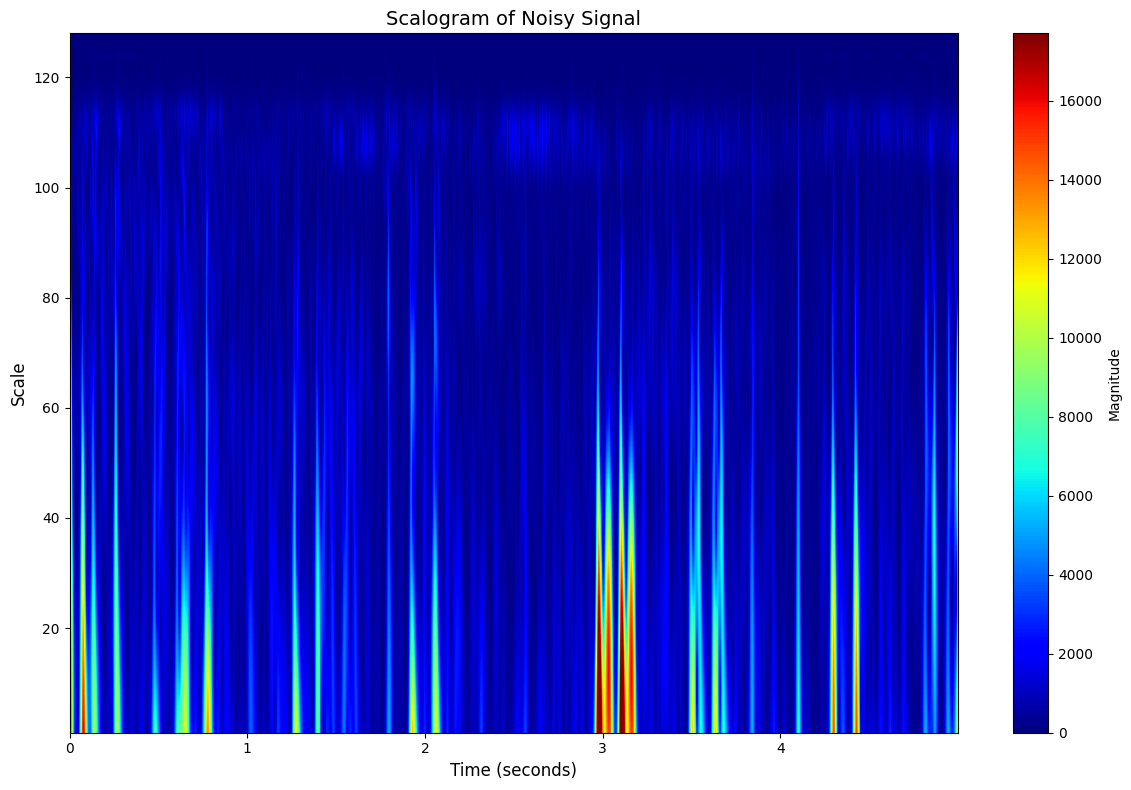

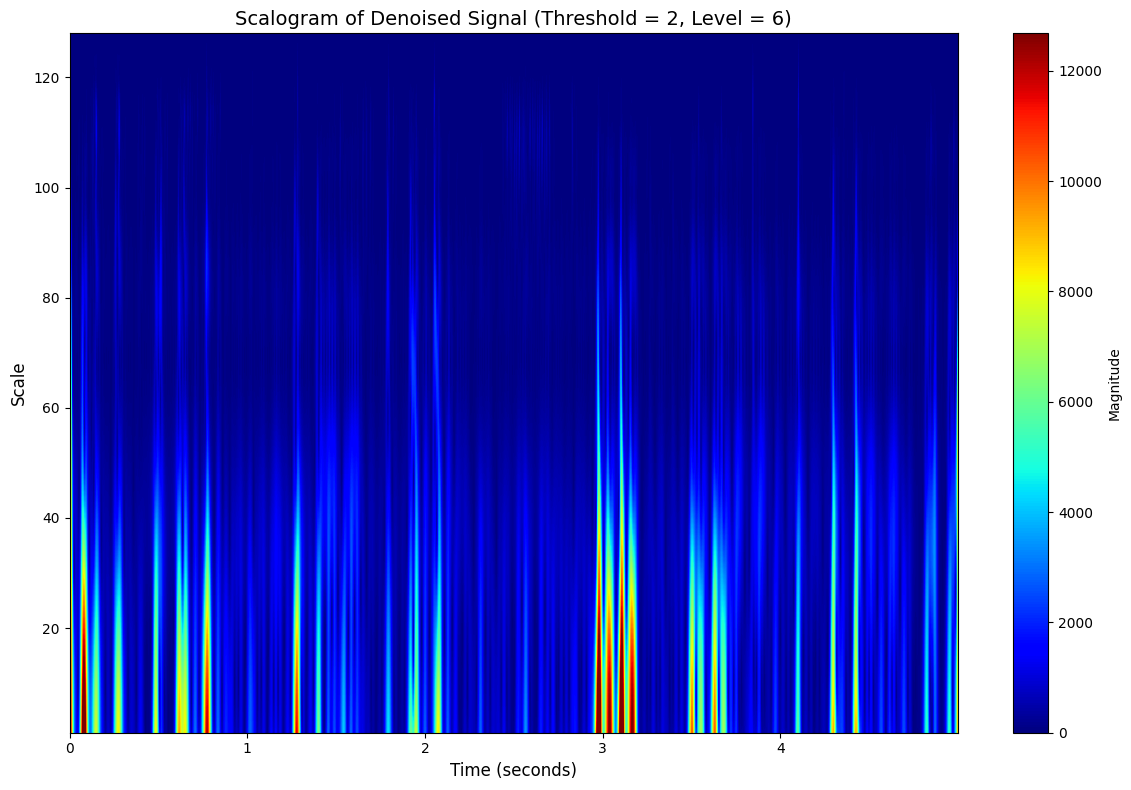

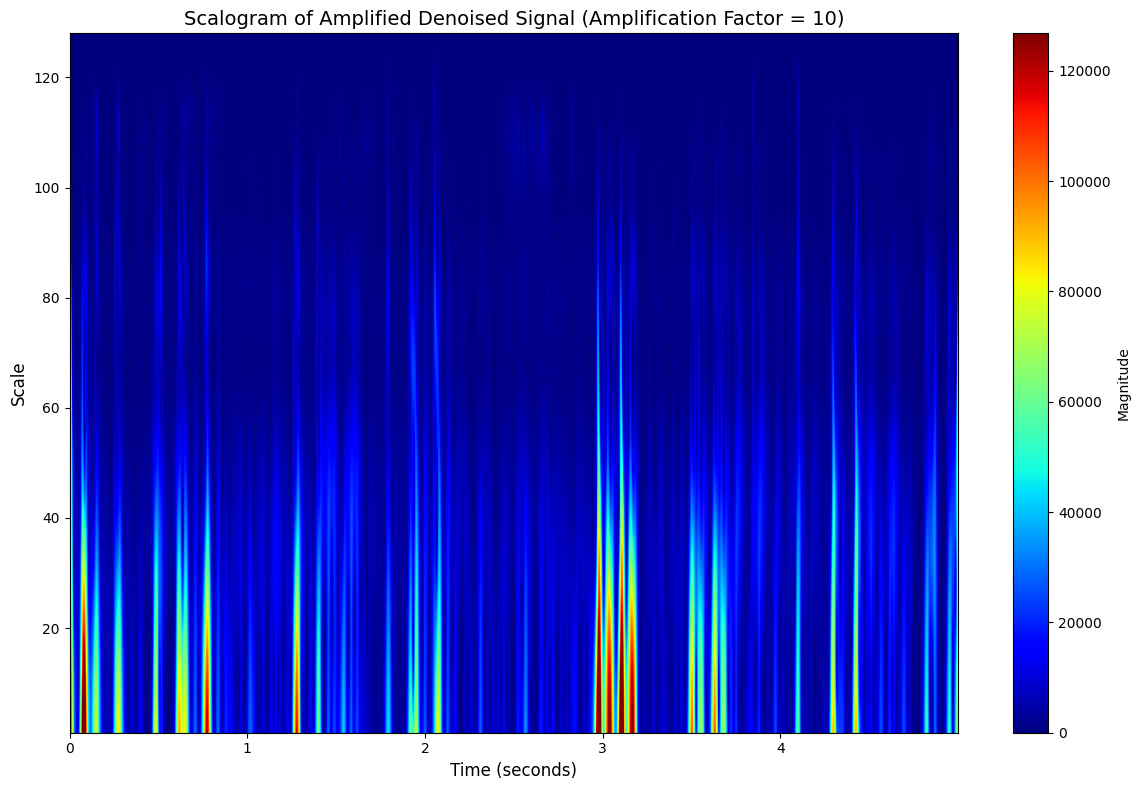

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pywt
import scipy.io.wavfile as wavfile

# Function to load wav file and return the audio signal and framerate
def load_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        framerate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        signal = wav_file.readframes(n_frames)
        signal = np.frombuffer(signal, dtype=np.int16)

        # If stereo, average both channels
        if n_channels == 2:
            signal = signal.reshape(-1, 2)
            signal = signal.mean(axis=1)

        return signal, framerate

# Improved wavelet denoising function
def improved_wavelet_denoising(signal, wavelet='db4', threshold=0.1, level=6):
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Apply threshold to each level's coefficients
    coeffs_thresholded = [pywt.threshold(c, threshold * np.std(c), mode='soft') for c in coeffs]

    # Reconstruct the signal from the thresholded coefficients
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)

    # Ensure the signal length is the same as the original signal
    denoised_signal = denoised_signal[:len(signal)]

    return denoised_signal

# Function to plot scalogram with time domain
def plot_scalogram(signal, framerate, title, wavelet='cmor1.5-1.0', scale_range=128):
    duration = len(signal) / framerate  # Total duration of the signal in seconds
    time_axis = np.linspace(0, duration, len(signal))  # Time values in seconds

    scales = np.arange(1, scale_range)
    coef, freqs = pywt.cwt(signal, scales, wavelet)

    plt.figure(figsize=(12, 8))
    plt.imshow(np.abs(coef), extent=[0, duration, 1, scale_range], cmap='jet', aspect='auto',
               vmax=abs(coef).max() * 0.75, vmin=0)
    plt.colorbar(label='Magnitude')
    plt.title(f'Scalogram of {title}', fontsize=14)
    plt.ylabel('Scale', fontsize=12)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Load your noisy audio file (replace with actual file path)
file_path_noisy = '/content/denoised_track2_extreme_amplified.wav'  # Path to your noisy audio file

# Load the noisy audio signal
signal_noisy, framerate_noisy = load_wav(file_path_noisy)

# Set a higher threshold and apply denoising
custom_threshold = 2
level_of_decomposition = 6
# Apply improved wavelet denoising
denoised_signal = improved_wavelet_denoising(signal_noisy, threshold=custom_threshold, level=level_of_decomposition)

# Amplify the denoised audio
amplification_factor = 10  # Set an appropriate amplification factor
denoised_signal_amplified = denoised_signal * amplification_factor

# Save the amplified and denoised audio to a new WAV file
output_file = 'improved_amplified_double_denoised_audio.wav'
wavfile.write(output_file, framerate_noisy, denoised_signal_amplified.astype(np.int16))

# Plot scalograms for the original noisy, denoised, and amplified denoised signals
plot_scalogram(signal_noisy, framerate_noisy, "Noisy Signal")
plot_scalogram(denoised_signal, framerate_noisy, f"Denoised Signal (Threshold = {custom_threshold}, Level = {level_of_decomposition})")
plot_scalogram(denoised_signal_amplified, framerate_noisy, f"Amplified Denoised Signal (Amplification Factor = {amplification_factor})")



In [ ]:
pip install numpy scipy librosa matplotlib scikit-learn


In [ ]:
pip install librosa matplotlib

In [ ]:
pip install soundfile


In [ ]:
pip install librosa soundfile matplotlib pywavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.1 MB/s eta 0:00:00


In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import scipy.io.wavfile as wavfile

# Function to load wav file and return the audio signal and framerate
def load_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        framerate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        signal = wav_file.readframes(n_frames)
        signal = np.frombuffer(signal, dtype=np.int16)

        # If stereo, average both channels
        if n_channels == 2:
            signal = signal.reshape(-1, 2)
            signal = signal.mean(axis=1)

        return signal, framerate

# Apply ridge regression for noise reduction using the actual noise signal
def apply_ridge_regression(signal, noise_signal, alpha=1.0):
    X = noise_signal.reshape(-1, 1)  # Noise as features
    y = signal  # Noisy signal as target

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_scaled, y)

    predicted_noise = ridge_regressor.predict(X_scaled)

    # Subtract the predicted noise
    signal_denoised_ridge = signal - predicted_noise

    return signal_denoised_ridge

# Improved wavelet denoising function
def improved_wavelet_denoising(signal, wavelet='db4', threshold=0.1, level=6):
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Apply threshold to each level's coefficients
    coeffs_thresholded = [pywt.threshold(c, threshold * np.std(c), mode='soft') for c in coeffs]

    # Reconstruct the signal from the thresholded coefficients
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)

    # Ensure the signal length is the same as the original signal
    denoised_signal = denoised_signal[:len(signal)]

    return denoised_signal

# Function to plot scalogram
def plot_scalogram(signal, title, wavelet='cmor1.5-1.0', scale_range=128):
    scales = np.arange(1, scale_range)
    coef, freqs = pywt.cwt(signal, scales, wavelet)

    plt.figure(figsize=(12, 8))
    plt.imshow(np.abs(coef), extent=[0, len(signal), 1, scale_range], cmap='jet', aspect='auto',
               vmax=abs(coef).max() * 0.75, vmin=0)
    plt.colorbar(label='Magnitude')
    plt.title(f'Scalogram of {title}', fontsize=14)
    plt.ylabel('Scale', fontsize=12)
    plt.xlabel('Time', fontsize=12)
    plt.tight_layout()
    plt.show()

# Load your heart signal with noise and pure noise audio files
file_path_heart_signal = '/content/track_2.wav'
file_path_noise_signal = '/content/track_4.wav'

# Load the noisy heart audio signal and the pure noise signal
signal_noisy, framerate_noisy = load_wav(file_path_heart_signal)
noise_signal, framerate_noise = load_wav(file_path_noise_signal)

# Ensure both signals have the same length (trim if necessary)
min_len = min(len(signal_noisy), len(noise_signal))
signal_noisy = signal_noisy[:min_len]
noise_signal = noise_signal[:min_len]

# Step 0: Plot scalograms of the noisy heart signal and noise before Ridge Regression
plot_scalogram(signal_noisy, "Noisy Heart Signal Before Ridge Regression")
plot_scalogram(noise_signal, "Pure Noise Signal")

# Step 1: Apply Ridge Regression for noise reduction using the actual noise signal
denoised_signal_ridge = apply_ridge_regression(signal_noisy, noise_signal, alpha=1.0)

# Plot scalogram after ridge regression
plot_scalogram(denoised_signal_ridge, "Signal After Ridge Regression")

# Step 2: Apply Wavelet denoising on the ridge-regression denoised signal
custom_threshold = 2  # Higher threshold for wavelet
level_of_decomposition = 6  # Lower level decomposition

denoised_signal_final = improved_wavelet_denoising(denoised_signal_ridge, threshold=custom_threshold, level=level_of_decomposition)

# Save the final denoised audio to a new file
output_file = 'ridge_wavelet_denoised_audio.wav'
wavfile.write(output_file, framerate_noisy, denoised_signal_final.astype(np.int16))

# Plot the scalogram of the final denoised signal
plot_scalogram(denoised_signal_final, f"Denoised Signal After Ridge Regression and Wavelet (Threshold = {custom_threshold}, Level = {level_of_decomposition})")





FileNotFoundError: [Errno 2] No such file or directory: '/content/track_2.wav'

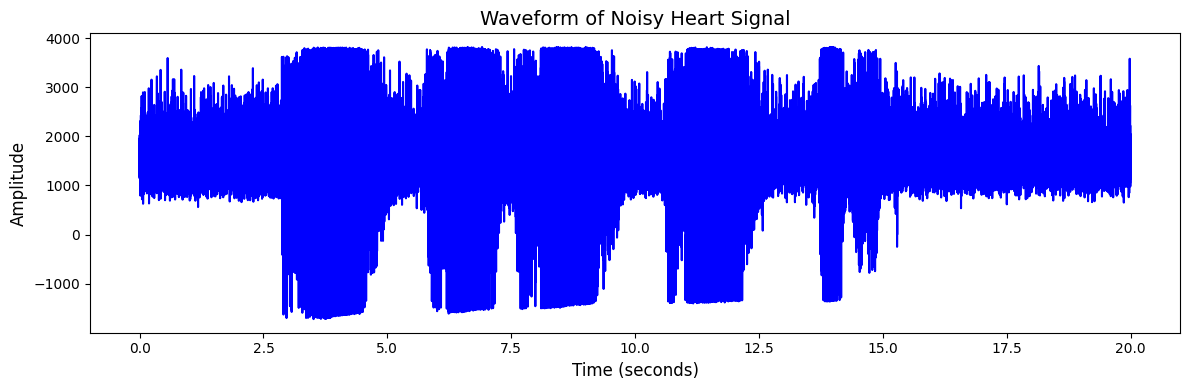

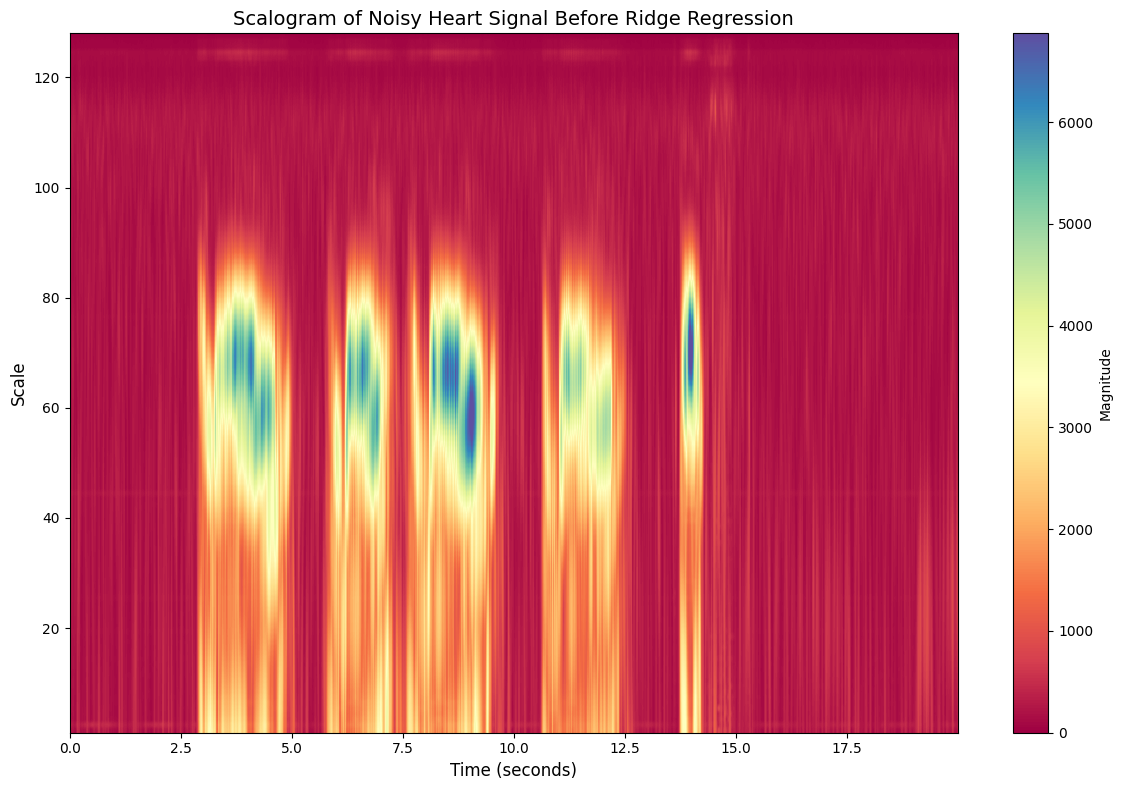

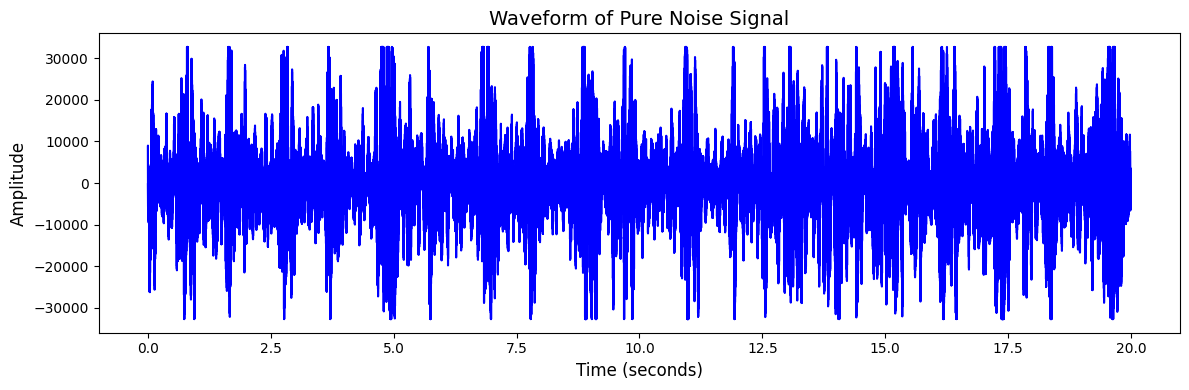

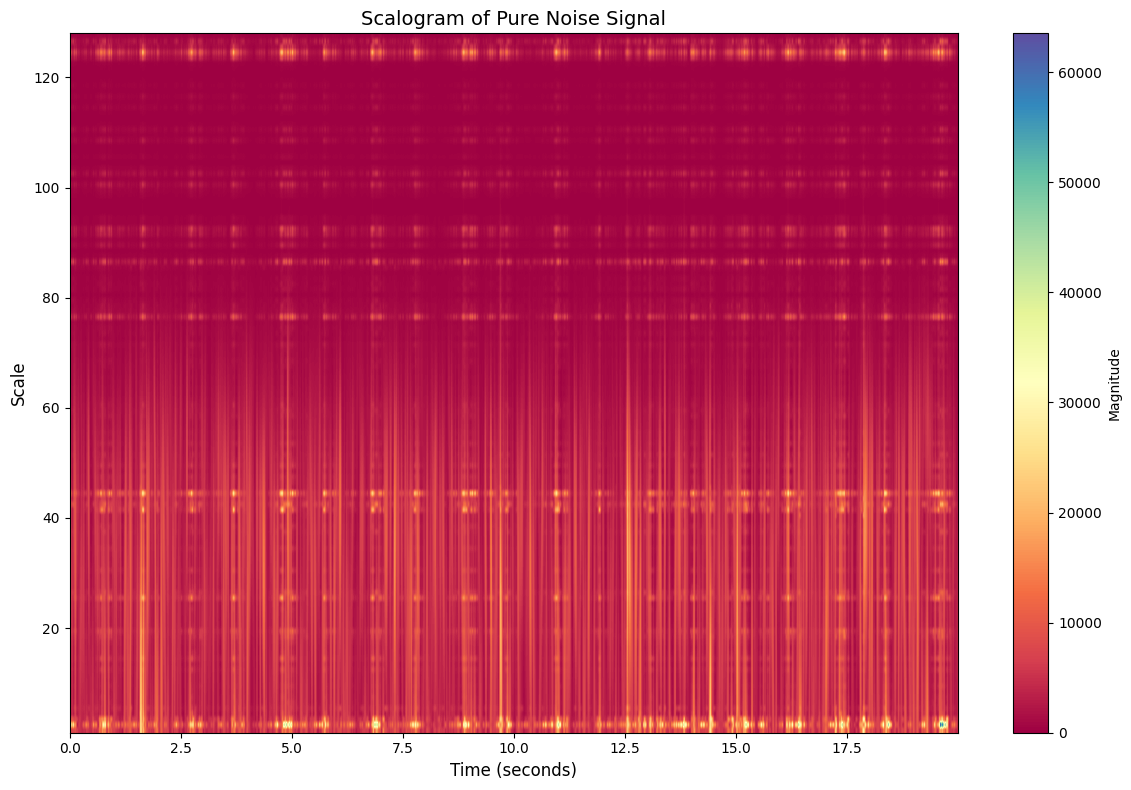

NameError: name 'denoised_signal_ridge' is not defined

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import scipy.io.wavfile as wavfile

# Function to load wav file and return the audio signal and framerate
def load_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        framerate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        signal = wav_file.readframes(n_frames)
        signal = np.frombuffer(signal, dtype=np.int16)

        # If stereo, average both channels
        if n_channels == 2:
            signal = signal.reshape(-1, 2)
            signal = signal.mean(axis=1)

        return signal, framerate

# Apply ridge regression for noise reduction using the actual noise signal
def apply_ridge_regression(signal, noise_signal, alpha=1.0):
    X = noise_signal.reshape(-1, 1)  # Noise as features
    y = signal  # Noisy signal as target

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_scaled, y)

    predicted_noise = ridge_regressor.predict(X_scaled)

    # Subtract the predicted noise
    signal_denoised_ridge = signal - predicted_noise

    return signal_denoised_ridge

# Improved wavelet denoising function
def improved_wavelet_denoising(signal, wavelet='db4', threshold=0.1, level=6):
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Apply threshold to each level's coefficients
    coeffs_thresholded = [pywt.threshold(c, threshold * np.std(c), mode='soft') for c in coeffs]

    # Reconstruct the signal from the thresholded coefficients
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)

    # Ensure the signal length is the same as the original signal
    denoised_signal = denoised_signal[:len(signal)]

    return denoised_signal

# Function to plot scalogram
def plot_scalogram(signal, framerate, title, wavelet='cmor1.5-1.0', scale_range=128):
    scales = np.arange(1, scale_range)
    coef, freqs = pywt.cwt(signal, scales, wavelet)

    # Calculate time in seconds
    time_in_seconds = len(signal) / framerate
    time_axis = np.linspace(0, time_in_seconds, num=len(signal))

    plt.figure(figsize=(12, 8))
    plt.imshow(np.abs(coef), extent=[0, time_in_seconds, 1, scale_range], cmap='Spectral', aspect='auto',
               vmax=abs(coef).max() * 0.75, vmin=0)
    plt.colorbar(label='Magnitude')
    plt.title(f'Scalogram of {title}', fontsize=14)
    plt.ylabel('Scale', fontsize=12)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Function to plot waveform in time domain
def plot_waveform(signal, framerate, title):
    time_axis = np.linspace(0, len(signal) / framerate, num=len(signal))
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, signal, color='b')
    plt.title(f'Waveform of {title}', fontsize=14)
    plt.ylabel('Amplitude', fontsize=12)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Load your heart signal with noise and pure noise audio files
file_path_heart_signal = '/content/mbPIIvZSmhA0rxRkhZBS_raw.wav'
file_path_noise_signal = '/content/recordings_BacASOsTE52zMLQac0YZ_wKD2jrXSpaOMZhC9itWy_filtered.wav'

# Load the noisy heart audio signal and the pure noise signal
signal_noisy, framerate_noisy = load_wav(file_path_heart_signal)
noise_signal, framerate_noise = load_wav(file_path_noise_signal)

# Ensure both signals have the same length (trim if necessary)
min_len = min(len(signal_noisy), len(noise_signal))
signal_noisy = signal_noisy[:min_len]
noise_signal = noise_signal[:min_len]

# Step 0: Plot the waveform and scalogram of the noisy heart signal and noise
plot_waveform(signal_noisy, framerate_noisy, "Noisy Heart Signal")
plot_scalogram(signal_noisy, framerate_noisy, "Noisy Heart Signal Before Ridge Regression")

plot_waveform(noise_signal, framerate_noise, "Pure Noise Signal")
plot_scalogram(noise_signal, framerate_noise, "Pure Noise Signal")

# Plot scalogram after ridge regression
plot_scalogram(denoised_signal_ridge, framerate_noisy, "Signal After Ridge Regression")

# Plot the scalogram of the final denoised signal
plot_scalogram(denoised_signal_final, framerate_noisy,
               f"Denoised Signal After Ridge Regression and Wavelet (Threshold = {custom_threshold}, Level = {level_of_decomposition})")

plot_waveform(noise_signal, framerate_noise, "Pure Noise Signal")
plot_scalogram(noise_signal, "Pure Noise Signal")

# Step 1: Apply Ridge Regression for noise reduction using the actual noise signal
denoised_signal_ridge = apply_ridge_regression(signal_noisy, noise_signal, alpha=1.0)

# Plot scalogram after ridge regression
plot_scalogram(denoised_signal_ridge, "Signal After Ridge Regression")

# Step 2: Apply Wavelet denoising on the ridge-regression denoised signal
custom_threshold = 1.0  # Higher threshold for wavelet
level_of_decomposition = 6  # Lower level decomposition

denoised_signal_final = improved_wavelet_denoising(denoised_signal_ridge, threshold=custom_threshold, level=level_of_decomposition)

# Save the final denoised audio to a new file
output_file = 'ridge_wavelet_denoised_audio.wav'
wavfile.write(output_file, framerate_noisy, denoised_signal_final.astype(np.int16))

# Plot the scalogram of the final denoised signal
plot_scalogram(denoised_signal_final, f"Denoised Signal After Ridge Regression and Wavelet (Threshold = {custom_threshold}, Level = {level_of_decomposition})")


In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import scipy.io.wavfile as wavfile

# Function to load wav file and return the audio signal and framerate
def load_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        framerate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        signal = wav_file.readframes(n_frames)
        signal = np.frombuffer(signal, dtype=np.int16)

        # If stereo, average both channels
        if n_channels == 2:
            signal = signal.reshape(-1, 2)
            signal = signal.mean(axis=1)

        return signal, framerate

# Apply ridge regression for noise reduction using the actual noise signal
def apply_ridge_regression(signal, noise_signal, alpha=1.0):
    X = noise_signal.reshape(-1, 1)  # Noise as features
    y = signal  # Noisy signal as target

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_scaled, y)

    predicted_noise = ridge_regressor.predict(X_scaled)

    # Subtract the predicted noise
    signal_denoised_ridge = signal - predicted_noise

    return signal_denoised_ridge

# Improved wavelet denoising function
def improved_wavelet_denoising(signal, wavelet='db4', threshold=0.1, level=6):
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Apply threshold to each level's coefficients
    coeffs_thresholded = [pywt.threshold(c, threshold * np.std(c), mode='soft') for c in coeffs]

    # Reconstruct the signal from the thresholded coefficients
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet)

    # Ensure the signal length is the same as the original signal
    denoised_signal = denoised_signal[:len(signal)]

    return denoised_signal

# Function to plot scalogram
def plot_scalogram(signal, framerate, title, wavelet='cmor1.5-1.0', scale_range=128):
    scales = np.arange(1, scale_range)
    coef, freqs = pywt.cwt(signal, scales, wavelet)

    # Calculate time in seconds
    time_in_seconds = len(signal) / framerate
    time_axis = np.linspace(0, time_in_seconds, num=len(signal))

    plt.figure(figsize=(12, 8))
    plt.imshow(np.abs(coef), extent=[0, time_in_seconds, 1, scale_range], cmap='Spectral', aspect='auto',
               vmax=abs(coef).max() * 0.75, vmin=0)
    plt.colorbar(label='Magnitude')
    plt.title(f'Scalogram of {title}', fontsize=14)
    plt.ylabel('Scale', fontsize=12)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Function to plot waveform in time domain
def plot_waveform(signal, framerate, title):
    time_axis = np.linspace(0, len(signal) / framerate, num=len(signal))
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, signal, color='b')
    plt.title(f'Waveform of {title}', fontsize=14)
    plt.ylabel('Amplitude', fontsize=12)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Load your heart signal with noise and pure noise audio files
file_path_heart_signal = '/content/recordings_BacASOsTE52zMLQac0YZ_mbPIIvZSmhA0rxRkhZBS_filtered.wav'
file_path_noise_signal = '/content/recordings_BacASOsTE52zMLQac0YZ_wKD2jrXSpaOMZhC9itWy_filtered.wav'

# Load the noisy heart audio signal and the pure noise signal
signal_noisy, framerate_noisy = load_wav(file_path_heart_signal)
noise_signal, framerate_noise = load_wav(file_path_noise_signal)

# Ensure both signals have the same length (trim if necessary)
min_len = min(len(signal_noisy), len(noise_signal))
signal_noisy = signal_noisy[:min_len]
noise_signal = noise_signal[:min_len]

# Step 0: Plot the waveform and scalogram of the noisy heart signal and noise
plot_waveform(signal_noisy, framerate_noisy, "Noisy Heart Signal")
plot_scalogram(signal_noisy, framerate_noisy, "Noisy Heart Signal Before Ridge Regression")

plot_waveform(noise_signal, framerate_noise, "Pure Noise Signal")
plot_scalogram(noise_signal, framerate_noise, "Pure Noise Signal")

# Step 1: Apply Ridge Regression for noise reduction using the actual noise signal
denoised_signal_ridge = apply_ridge_regression(signal_noisy, noise_signal, alpha=1.0)

# Plot scalogram after ridge regression
plot_scalogram(denoised_signal_ridge, framerate_noisy, "Signal After Ridge Regression")

# Step 2: Apply Wavelet denoising on the ridge-regression denoised signal
custom_threshold = 1.0  # Higher threshold for wavelet
level_of_decomposition = 6  # Lower level decomposition

denoised_signal_final = improved_wavelet_denoising(denoised_signal_ridge, threshold=custom_threshold, level=level_of_decomposition)

# Save the final denoised audio to a new file
output_file = 'ridge_wavelet_denoised_audio.wav'
wavfile.write(output_file, framerate_noisy, denoised_signal_final.astype(np.int16))

# Plot the final denoised signal
plot_scalogram(denoised_signal_final, framerate_noisy,
               f"Denoised Signal After Ridge Regression and Wavelet (Threshold = {custom_threshold}, Level = {level_of_decomposition})")



ModuleNotFoundError: No module named 'pywt'

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Load and read the four-track audio file
file_path = '/content/dOlBlisvBGBM9WE7MzUn_raw.wav'

# Open the wave file
with wave.open(file_path, 'rb') as audio_file:
    # Basic audio properties
    num_channels = audio_file.getnchannels()
    sample_width = audio_file.getsampwidth()
    framerate = audio_file.getframerate()
    num_frames = audio_file.getnframes()

    # Read frames and convert to numpy array
    audio_data = audio_file.readframes(num_frames)
    audio_array = np.frombuffer(audio_data, dtype=np.int16)

    # Separate the tracks (assuming 4-channel audio)
    if num_channels == 4:
        track1 = audio_array[0::4]
        track2 = audio_array[1::4]
        track3 = audio_array[2::4]
        track4 = audio_array[3::4]
    else:
        # Handle case where audio file does not have 4 channels
        track1 = track2 = track3 = track4 = None

# Display track information and plot waveform if 4 channels were detected
(track1, track2, track3, track4), num_channels, framerate


((array([ 703, 1027, 1232, ..., 1528, 1598, 1635], dtype=int16),
  array([1941, 1948, 1944, ..., 1877, 1858, 1867], dtype=int16),
  array([1844, 1829, 1821, ..., 1833, 1807, 1763], dtype=int16),
  array([1895, 1860, 1797, ..., 1934, 2057, 2070], dtype=int16)),
 4,
 8000)

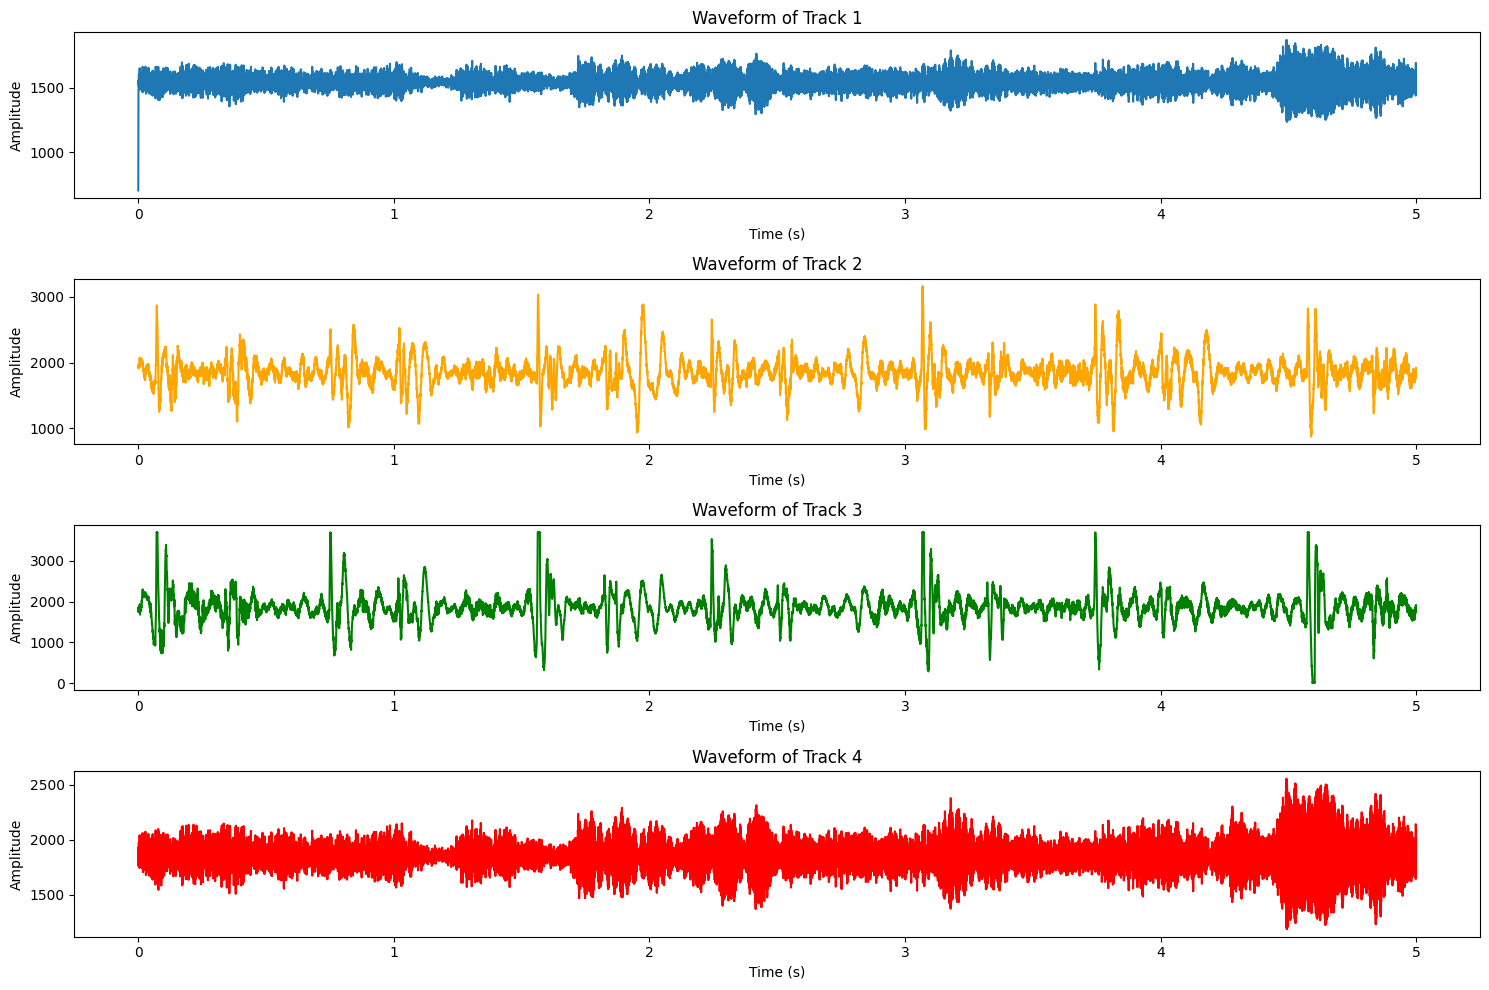

In [ ]:
# Truncate tracks to the same minimum length to avoid dimension mismatch
min_length = min(len(track1), len(track2), len(track3), len(track4))

# Trim each track to the minimum length
track1 = track1[:min_length]
track2 = track2[:min_length]
track3 = track3[:min_length]
track4 = track4[:min_length]

# Update time array to match the new minimum length
time = np.linspace(0, min_length / framerate, num=min_length)

# Plot the waveforms again
plt.figure(figsize=(15, 10))

# Plot Track 1
plt.subplot(4, 1, 1)
plt.plot(time, track1, label="Track 1")
plt.title("Waveform of Track 1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot Track 2
plt.subplot(4, 1, 2)
plt.plot(time, track2, label="Track 2", color="orange")
plt.title("Waveform of Track 2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot Track 3
plt.subplot(4, 1, 3)
plt.plot(time, track3, label="Track 3", color="green")
plt.title("Waveform of Track 3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot Track 4
plt.subplot(4, 1, 4)
plt.plot(time, track4, label="Track 4", color="red")
plt.title("Waveform of Track 4")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


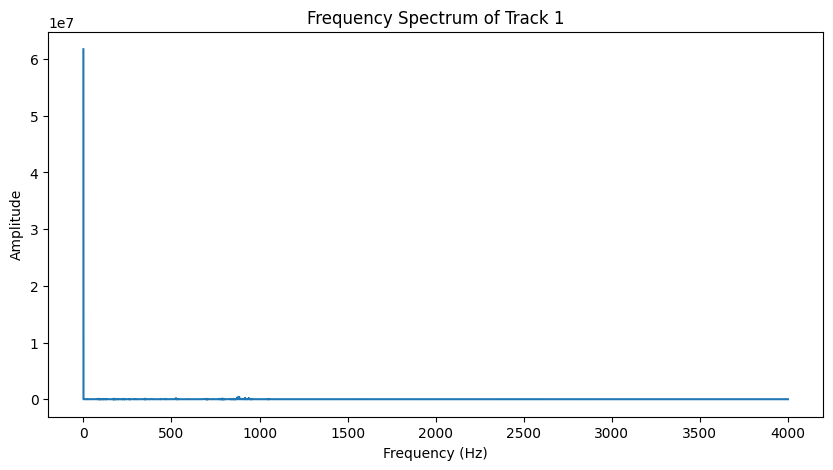

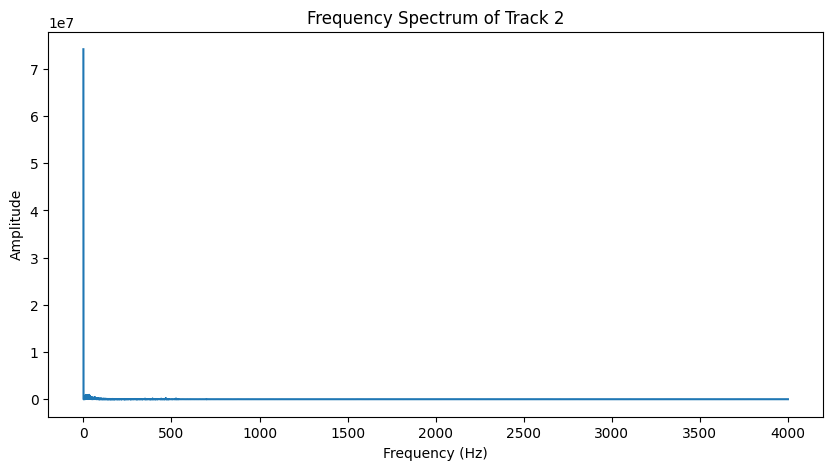

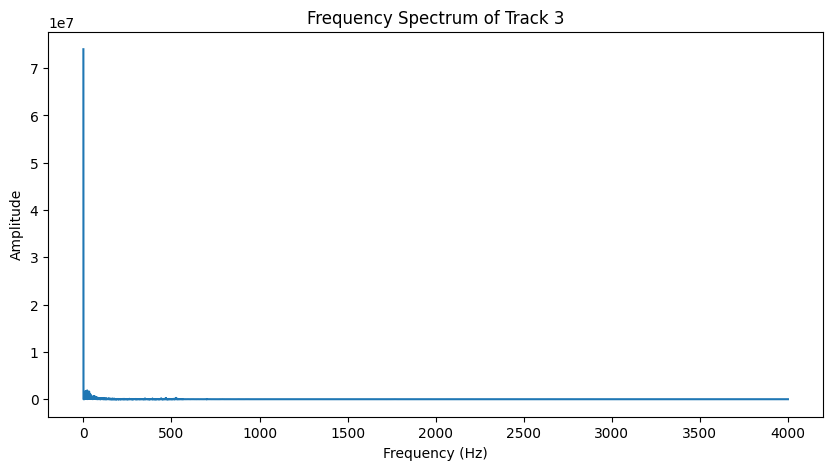

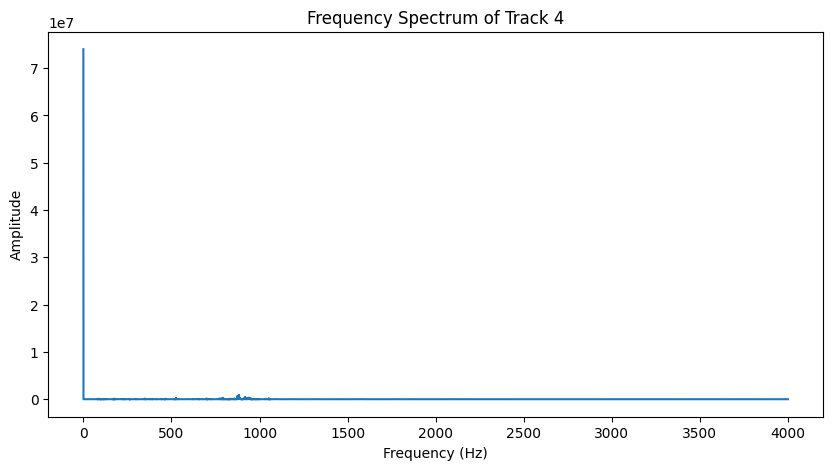

In [ ]:
from scipy.fft import fft, fftfreq

# Define function to plot frequency spectrum for each track
def plot_frequency_spectrum(track, track_label, framerate, min_length):
    # Perform FFT and get frequency components
    spectrum = fft(track)
    frequencies = fftfreq(min_length, 1 / framerate)

    # Plot only positive frequencies (real signals)
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies[:min_length // 2], np.abs(spectrum[:min_length // 2]))
    plt.title(f"Frequency Spectrum of {track_label}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()

# Analyze frequency spectrum for each track
plot_frequency_spectrum(track1, "Track 1", framerate, min_length)
plot_frequency_spectrum(track2, "Track 2", framerate, min_length)
plot_frequency_spectrum(track3, "Track 3", framerate, min_length)
plot_frequency_spectrum(track4, "Track 4", framerate, min_length)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Parameters for segmentation
segment_length = 2048  # Segment size (samples)
overlap = segment_length // 2  # 50% overlap

# Prepare lists for segments
segments = {'Track 1': [], 'Track 3': [], 'Track 4': [], 'Track 2': []}

# Segment each track and standardize data for training
for start in range(0, min_length - segment_length, overlap):
    end = start + segment_length
    segments['Track 1'].append(track1[start:end])
    segments['Track 3'].append(track3[start:end])
    segments['Track 4'].append(track4[start:end])
    segments['Track 2'].append(track2[start:end])

# Convert segments to numpy arrays for easy handling
X_train = np.column_stack((np.array(segments['Track 1']),
                           np.array(segments['Track 3']),
                           np.array(segments['Track 4'])))
y_train = np.array(segments['Track 2'])

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# Train ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_scaled)

# Model is now trained; ready for denoising predictions
ridge_model.coef_, ridge_model.intercept_


(array([[-1.30571280e-03, -2.15517061e-03, -2.57159758e-03, ...,
          1.42732031e-03,  1.87888939e-03,  1.97896377e-03],
        [-1.36013775e-03, -2.13538113e-03, -2.47645681e-03, ...,
          1.69771663e-03,  2.05858281e-03,  1.95444547e-03],
        [-1.42689720e-03, -2.12525597e-03, -2.33197454e-03, ...,
          1.63536439e-03,  1.97950215e-03,  1.83705410e-03],
        ...,
        [ 1.34372646e-03,  2.21141676e-03,  2.69799677e-03, ...,
         -1.55494929e-04, -2.00714273e-03, -3.89632392e-03],
        [ 1.58294070e-03,  2.41169927e-03,  2.79036684e-03, ...,
          9.54923864e-05, -1.76323340e-03, -3.74701985e-03],
        [ 1.85324297e-03,  2.70894267e-03,  2.99007988e-03, ...,
          1.17929980e-04, -1.80928687e-03, -3.83189280e-03]]),
 array([-3.31172461e-16,  3.88750759e-18,  1.61176291e-16, ...,
         3.24534870e-16, -3.88339588e-16, -8.50074298e-17]))

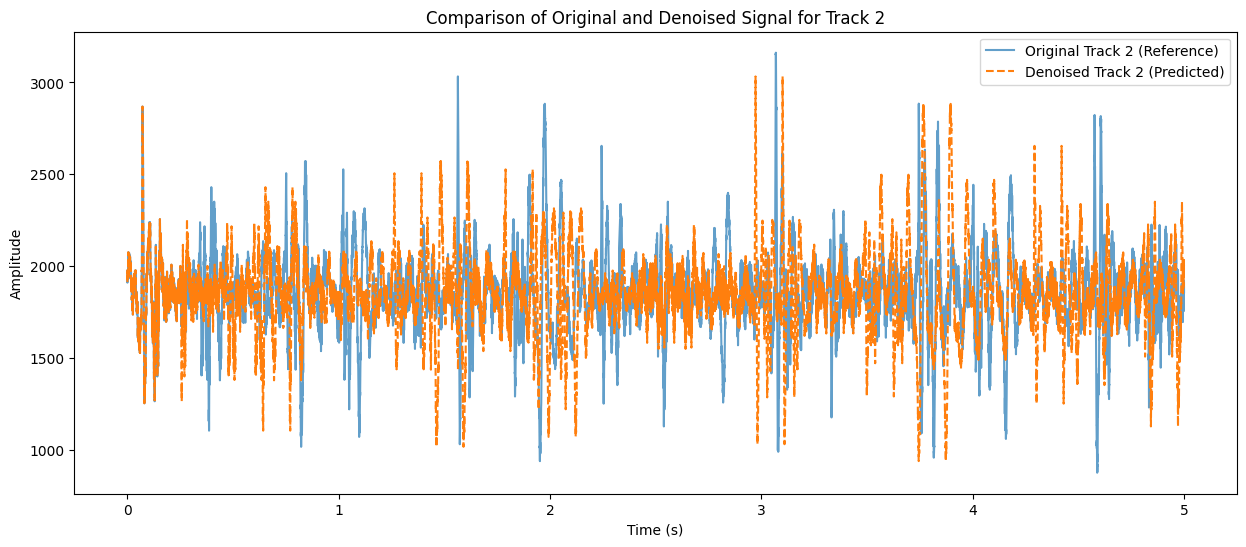

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/denoised_track2.wav'

In [ ]:
# Predicting the denoised signal using the trained ridge model
X_train_pred_scaled = ridge_model.predict(X_train_scaled)

# Inverse transform the prediction to original scale
X_train_pred = scaler_y.inverse_transform(X_train_pred_scaled)

# Flatten segments to reconstruct the full denoised signal
denoised_signal = X_train_pred.flatten()

# Ensure the denoised signal length matches the original track length
denoised_signal = denoised_signal[:min_length]

# Plot the original reference track (Track 2) and the denoised version
plt.figure(figsize=(15, 6))
plt.plot(time, track2[:min_length], label="Original Track 2 (Reference)", alpha=0.7)
plt.plot(time, denoised_signal, label="Denoised Track 2 (Predicted)", linestyle='--')
plt.title("Comparison of Original and Denoised Signal for Track 2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
import scipy.io.wavfile as wavfile



In [ ]:
import wave
import numpy as np
import os
from scipy.io.wavfile import write


file_path = '/content/dOlBlisvBGBM9WE7MzUn_raw.wav'


with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    duration = n_frames / framerate
    audio_data = wav_file.readframes(n_frames)


audio_array = np.frombuffer(audio_data, dtype=np.int16)


expected_samples = n_frames * n_channels
actual_samples = len(audio_array)


if actual_samples % n_channels != 0:
    padding_needed = expected_samples - actual_samples
    audio_array = np.pad(audio_array, (0, padding_needed), mode='constant', constant_values=0)


reshaped_audio_array = np.reshape(audio_array, (-1, n_channels))


output_dir = 'separated_tracks'
os.makedirs(output_dir, exist_ok=True)


for i in range(n_channels):
    track_data = reshaped_audio_array[:, i]
    output_file = os.path.join(output_dir, f'track_{i+1}.wav')
    write(output_file, framerate, track_data.astype(np.int16))
    print(f'Track {i+1} saved to {output_file}')

print("所有音轨已成功导出！")


Track 1 saved to separated_tracks/track_1.wav
Track 2 saved to separated_tracks/track_2.wav
Track 3 saved to separated_tracks/track_3.wav
Track 4 saved to separated_tracks/track_4.wav
所有音轨已成功导出！


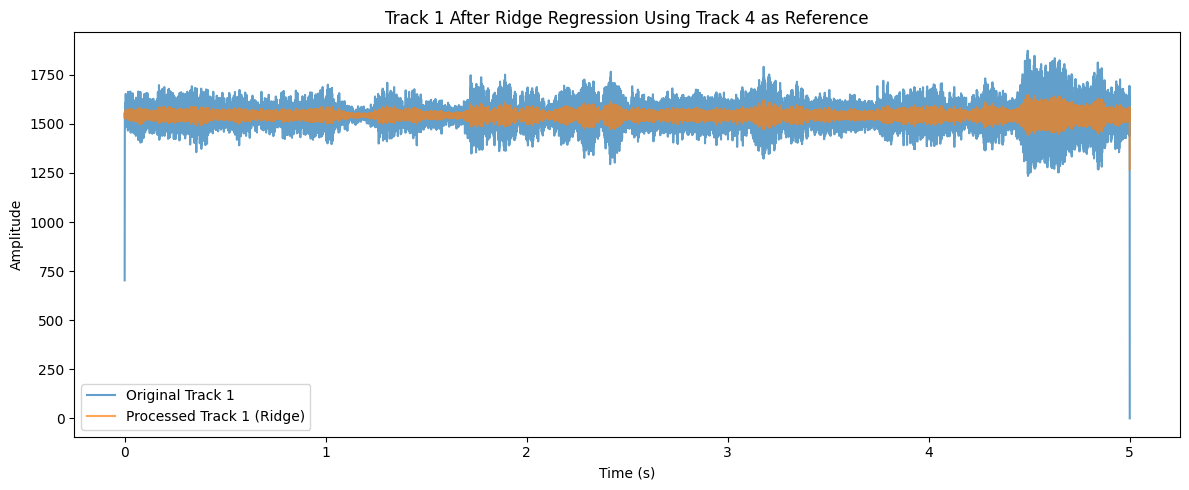

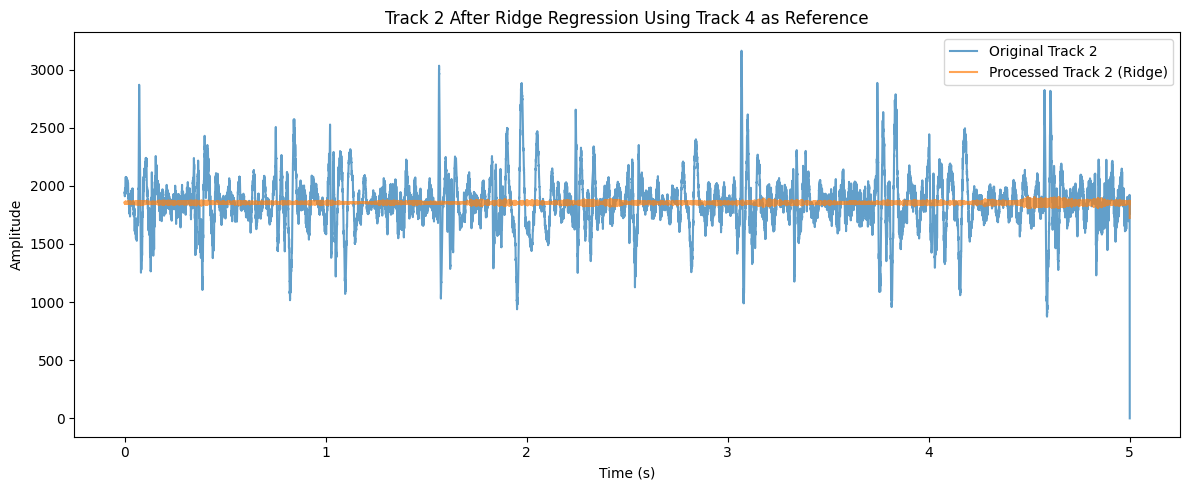

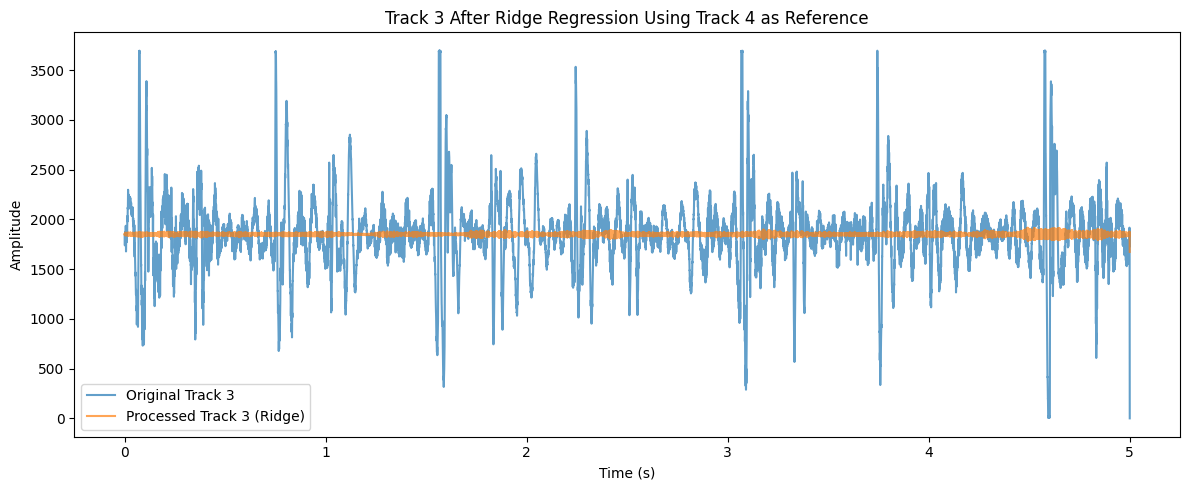

In [ ]:
from sklearn.linear_model import Ridge

# Use the 4th track as the reference (feature)
reference_track = reshaped_audio_array[:, 3]

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Prepare the first three tracks as targets
processed_tracks = []
time = np.linspace(0, duration, num=n_frames)

for i in range(3):
    # Train the ridge regression model
    target_track = reshaped_audio_array[:, i]
    ridge_model.fit(reference_track.reshape(-1, 1), target_track)

    # Predict the target using the reference
    predicted_track = ridge_model.predict(reference_track.reshape(-1, 1))
    processed_tracks.append(predicted_track)

    # Plot the original and processed tracks
    plt.figure(figsize=(12, 5))
    plt.plot(time, target_track, label=f'Original Track {i+1}', alpha=0.7)
    plt.plot(time, predicted_track, label=f'Processed Track {i+1} (Ridge)', alpha=0.7)
    plt.title(f'Track {i+1} After Ridge Regression Using Track 4 as Reference')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import os
from scipy.io.wavfile import write

# 定义处理后音频的输出目录
processed_output_dir = 'processed_tracks'
os.makedirs(processed_output_dir, exist_ok=True)

# 导出每个处理后的音轨为单独的WAV文件
for i, processed_track in enumerate(processed_tracks):
    output_file = os.path.join(processed_output_dir, f'processed_track_{i+1}.wav')
    write(output_file, framerate, processed_track.astype(np.int16))
    print(f'Processed Track {i+1} saved to {output_file}')

print("所有处理后的音轨已成功导出！")


Processed Track 1 saved to processed_tracks/processed_track_1.wav
Processed Track 2 saved to processed_tracks/processed_track_2.wav
Processed Track 3 saved to processed_tracks/processed_track_3.wav
所有处理后的音轨已成功导出！


In [ ]:
from scipy.io import wavfile

# Load the audio file to inspect its properties
file_path = '/content/dOlBlisvBGBM9WE7MzUn_raw (1).wav'

# Reading the WAV file
sample_rate, audio_data = wavfile.read(file_path)

# Checking the shape of the audio data and sample rate
sample_rate, audio_data.shape


(8000, (40000, 4))

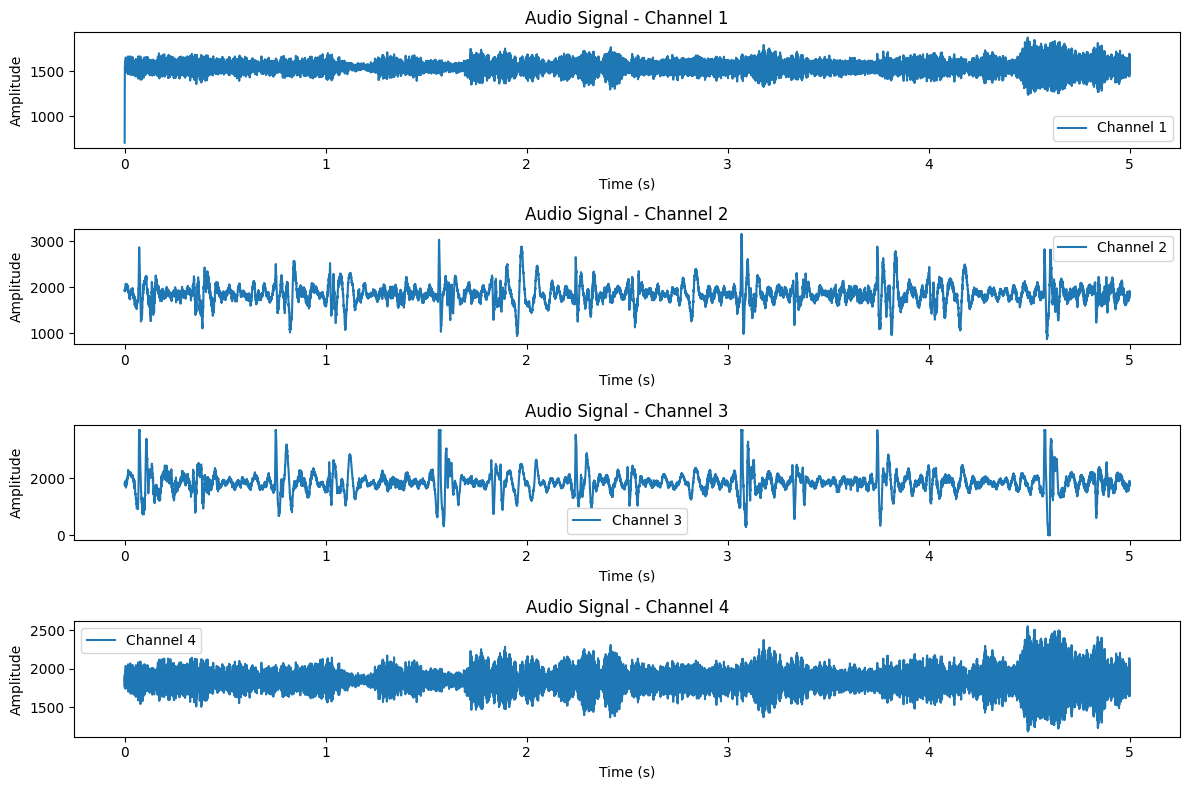

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract individual channels from the audio data
channels = [audio_data[:, i] for i in range(audio_data.shape[1])]

# Time axis for plotting
time_axis = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))

# Visualizing each channel
plt.figure(figsize=(12, 8))
for i, channel in enumerate(channels, start=1):
    plt.subplot(4, 1, i)
    plt.plot(time_axis, channel, label=f'Channel {i}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Audio Signal - Channel {i}')
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecting heart sound channels (assumed as Channels 1 and 2)
heart_sounds = np.stack(channels[:2], axis=1)

# Selecting noise channels (assumed as Channels 3 and 4)
noise_signals = np.stack(channels[2:], axis=1)

# Train-test split for regression
X_train, X_test, y_train, y_test = train_test_split(noise_signals, heart_sounds, test_size=0.2, random_state=42)

# Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicting heart sounds from noise signals
predicted_heart_sounds = ridge_model.predict(X_test)

# Calculate mean squared error as a performance metric
mse = mean_squared_error(y_test, predicted_heart_sounds)

# Subtracting predicted noise from the original heart sound channels for denoising
denoised_signals = heart_sounds - ridge_model.predict(noise_signals)

mse, denoised_signals.shape


(21441.734147262625, (40000, 2))

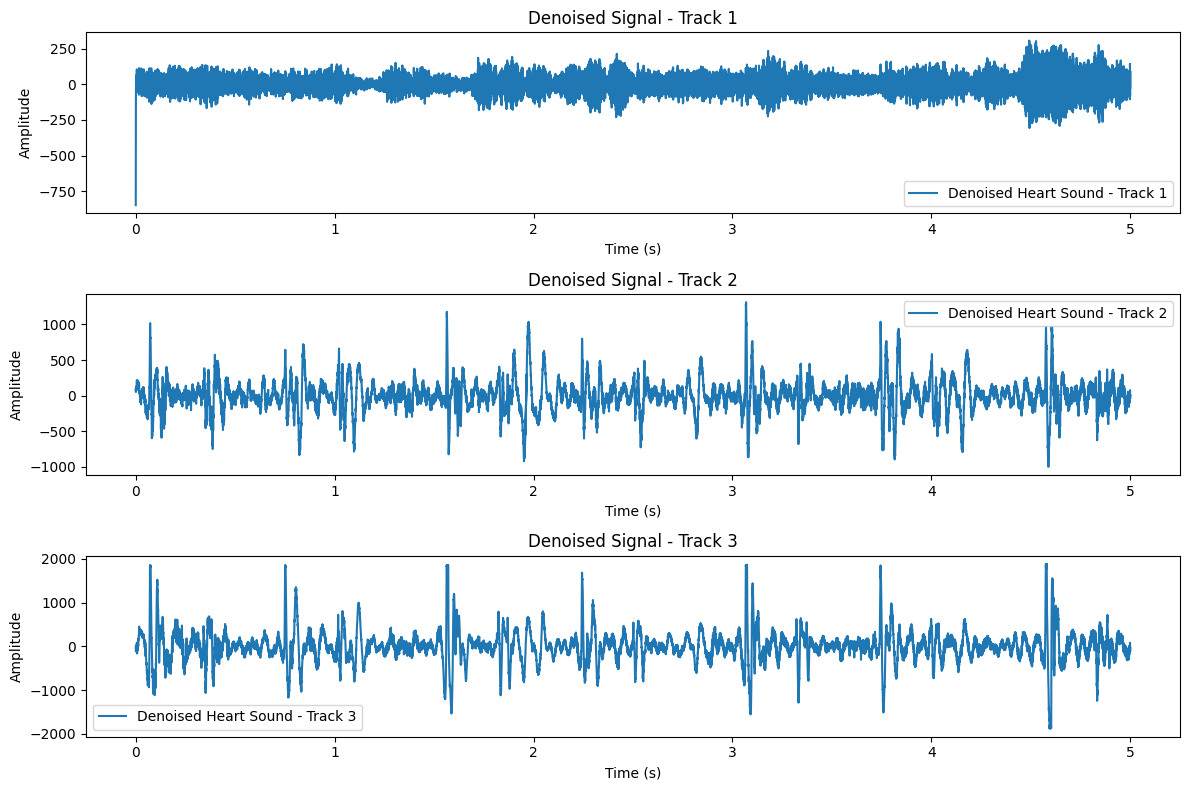

In [ ]:
# Assume Track 4 is noise and other tracks (1, 2, 3) contain the heart sounds and some noise.
# Using Track 4 as the noise predictor
noise_signal = channels[3]  # Track 4
heart_sounds = np.stack(channels[:3], axis=1)  # Tracks 1, 2, 3

# Reshape noise signal for regression
noise_signal = noise_signal.reshape(-1, 1)

# Train-test split for regression
X_train, X_test, y_train, y_test = train_test_split(noise_signal, heart_sounds, test_size=0.2, random_state=42)

# Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicting noise components in the heart sound tracks
predicted_noise = ridge_model.predict(noise_signal)

# Subtracting predicted noise to denoise the heart sound tracks
denoised_signals = heart_sounds - predicted_noise

# Visualizing the denoised signals
plt.figure(figsize=(12, 8))
for i in range(denoised_signals.shape[1]):
    plt.subplot(3, 1, i + 1)
    plt.plot(time_axis, denoised_signals[:, i], label=f'Denoised Heart Sound - Track {i + 1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Denoised Signal - Track {i + 1}')
    plt.legend()
plt.tight_layout()
plt.show()


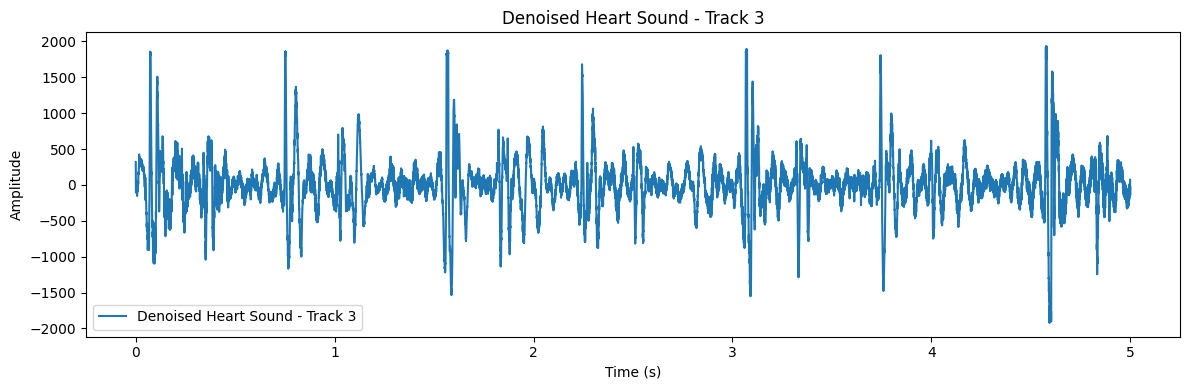

'/content/dOlBlisvBGBM9WE7MzUn_raw (1).wav'

In [ ]:
# Update to treat Track 1 and Track 4 as noise and Track 3 as the heart sound
# Track 3 is the target for denoising
heart_sound = channels[2]  # Track 3

# Stack Tracks 1 and 4 as noise predictors
noise_signals = np.stack((channels[0], channels[3]), axis=1)  # Tracks 1 and 4

# Train-test split for regression
X_train, X_test, y_train, y_test = train_test_split(noise_signals, heart_sound, test_size=0.2, random_state=42)

# Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicting noise components in the heart sound track
predicted_noise = ridge_model.predict(noise_signals)

# Subtracting predicted noise to denoise the heart sound track
denoised_heart_sound = heart_sound - predicted_noise

# Visualizing the denoised heart sound
plt.figure(figsize=(12, 4))
plt.plot(time_axis, denoised_heart_sound, label='Denoised Heart Sound - Track 3')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Denoised Heart Sound - Track 3')
plt.legend()
plt.tight_layout()
plt.show()

from scipy.io.wavfile import write

# Output file path
output_file_path = "/content/dOlBlisvBGBM9WE7MzUn_raw (1).wav"

# Normalize the denoised heart sound to prevent clipping
denoised_normalized = (denoised_heart_sound / np.max(np.abs(denoised_heart_sound)) * 32767).astype(np.int16)

# Save the denoised heart sound to a new WAV file
write(output_file_path, sample_rate, denoised_normalized)

output_file_path
